<a href="https://colab.research.google.com/github/VANHUUTHANHTRUNG/MLSmallProjects/blob/main/Ex4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
%cd /content/drive/MyDrive/Colab\ Notebooks/PRML/Set4

/content/drive/MyDrive/Colab Notebooks/PRML/Set4


### Task 3

Iteration 0: log-loss 98.03256669820165
Iteration 1: log-loss 91.34397561792775
Iteration 2: log-loss 87.52681954706104
Iteration 3: log-loss 85.00372029826187
Iteration 4: log-loss 83.18746739091674
Iteration 5: log-loss 81.80424087349144
Iteration 6: log-loss 80.70785692184774
Iteration 7: log-loss 79.81271420844024
Iteration 8: log-loss 79.06515206011306
Iteration 9: log-loss 78.42970551963091
Iteration 10: log-loss 77.88191521733667
Iteration 11: log-loss 77.40430608085776
Iteration 12: log-loss 76.98401452424409
Iteration 13: log-loss 76.61132528362197
Iteration 14: log-loss 76.27873518393628
Iteration 15: log-loss 75.98033484521041
Iteration 16: log-loss 75.71138901656799
Iteration 17: log-loss 75.46804478679817
Iteration 18: log-loss 75.24712431450871
Iteration 19: log-loss 75.04597473371082
Iteration 20: log-loss 74.86235754665668
Iteration 21: log-loss 74.69436580094867
Iteration 22: log-loss 74.54036114985091
Iteration 23: log-loss 74.39892536342325
Iteration 24: log-loss 74.

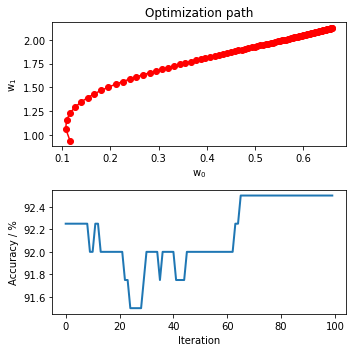

In [10]:
# load required packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def log_loss(w, X, y):
  """
  Computes the log-loss function at w. The
  computation uses the data in X with
  corresponding labels in y.
  """
  L = 0 # Accumulate loss terms here.
  for i in range(len(X)):
    L += np.log(1+ np.exp(-y[i]*np.transpose(w)@X[i]))
  return L

def grad(w, X, y):
  """
  Computes the gradient of the log-loss function
  at w. The computation uses the data in X with
  corresponding labels in y.
  """
  G = 0 # Accumulate gradient here.
  for i in range(len(X)):
    G -= 1/(1+np.exp(y[i]*np.transpose(w)@X[i]))*y[i]*X[i]
  return G

def getAccuracy(acc, pred):
  return np.sum(acc == pred) / len(pred)

if __name__ == "__main__":
  # TODO: Add your code here:

  # 1) Load X and y data:
  X = np.loadtxt("X.csv",delimiter=',')
  y = np.loadtxt("y.csv")

  # 2) Initialize w at random:
  np.random.seed(12)
  w = np.random.rand(X.shape[1])

  # 3) Set step_size to a small positive value
  step_size = 0.002

  # 4) Initialize empty lists for storing the path and
  # accuracies:
  w_array = []
  accuracy_list= []
  for iteration in range(100):

  # 5) Apply the gradient descent rule:
    w = w - step_size*grad(w,X,y)
    w_array.append(w)
  # 6) Print the current state:
    print(f"Iteration {iteration}: log-loss {log_loss(w,X,y)}")

    # 7) Compute the accuracy:
    pred = []
    for x in X:
      if 1/(1+ np.exp(-np.transpose(w)@x)) >= 1/2:
        pred.append(1)
      else:
        pred.append(-1)
    accuracy_list.append(getAccuracy(y, pred))

  # 8) Below is a template for plotting. Feel free to
  # rewrite if you prefer different style:
  w_array = np.array(w_array)
  plt.figure(figsize=[5, 5])
  plt.subplot(211)
  plt.plot(w_array[:, 0], w_array[:, 1], 'ro-')
  plt.xlabel('w$_0$')
  plt.ylabel('w$_1$')
  plt.title('Optimization path')
  plt.subplot(212)
  plt.plot(100.0 * np.array(accuracy_list), linewidth=2)
  plt.ylabel('Accuracy / %')
  plt.xlabel('Iteration')
  plt.tight_layout()
  plt.savefig("log_loss_minimization.pdf", bbox_inches="tight")

### Task 4

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.optimizers import SGD
import cv2
import csv
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


# Implement model from task 2
def model():
  model = Sequential()

  model.add(Conv2D(32, (5, 5), activation="relu", padding="same", input_shape=(64, 64,3))
  model.add(MaxPooling2D(4, 4))
  model.add(Conv2D(32, (5, 5), activation="relu", padding="same"))
  model.add(MaxPooling2D(4, 4))
  model.add(Flatten())
  model.add(Dense(100, activation="relu"))
  model.add(Dense(9, activation="sigmoid"))
  opt = SGD(lr=0.01, momentum=0.9)
  model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])
  return model

model = model()
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               51300     
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 9

In [16]:
# Reuse data
X = np.load('train_data.npy')
y = np.load('train_label.npy')
X = X.reshape(X.shape[0], 32, 32, 3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [19]:
def model():
  model = Sequential()

  model.add(Conv2D(32, (3, 3), activation="relu", padding="same", input_shape=(32, 32,3)))
  model.add(MaxPooling2D(2, 2))
  model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
  model.add(MaxPooling2D(2, 2))
  model.add(Flatten())
  model.add(Dense(100, activation="relu"))
  model.add(Dense(9, activation="sigmoid"))
  opt = SGD(lr=0.01, momentum=0.9)
  model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])
  return model
model = model()
model.fit(X_train, y_train, batch_size=64, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
112/112 [==============================] - 10s 85ms/step - loss: 2.0105 - accuracy: 0.1905 - val_loss: 1.8702 - val_accuracy: 0.2755
Epoch 2/20
112/112 [==============================] - 10s 85ms/step - loss: 1.6547 - accuracy: 0.3645 - val_loss: 1.5802 - val_accuracy: 0.4310
Epoch 3/20
112/112 [==============================] - 9s 84ms/step - loss: 1.0724 - accuracy: 0.6101 - val_loss: 0.8016 - val_accuracy: 0.7183
Epoch 4/20
112/112 [==============================] - 9s 85ms/step - loss: 0.6249 - accuracy: 0.7799 - val_loss: 0.6505 - val_accuracy: 0.7761
Epoch 5/20
112/112 [==============================] - 9s 84ms/step - loss: 0.3651 - accuracy: 0.8784 - val_loss: 0.2951 - val_accuracy: 0.9024
Epoch 6/20
112/112 [==============================] - 9s 84ms/step - loss: 0.2482 - accuracy: 0.9169 - val_loss: 0.3768 - val_accuracy: 0.8810
Epoch 7/20
112/112 [==============================] - 10s 85ms/step - loss: 0.1755 - accuracy: 0.9430 - val_loss: 0.1899 - val_accuracy: 0.9